--- Exercício 1: Hamiltoniano Tridiagonal com Cores por Banda ---
Parâmetros: α=0.5, α_diag2=0.15, α_diag3=0.05, N_G=11


/tmp/ipython-input-2-446898252.py:109: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10' if num_bands <= 10 else 'viridis')


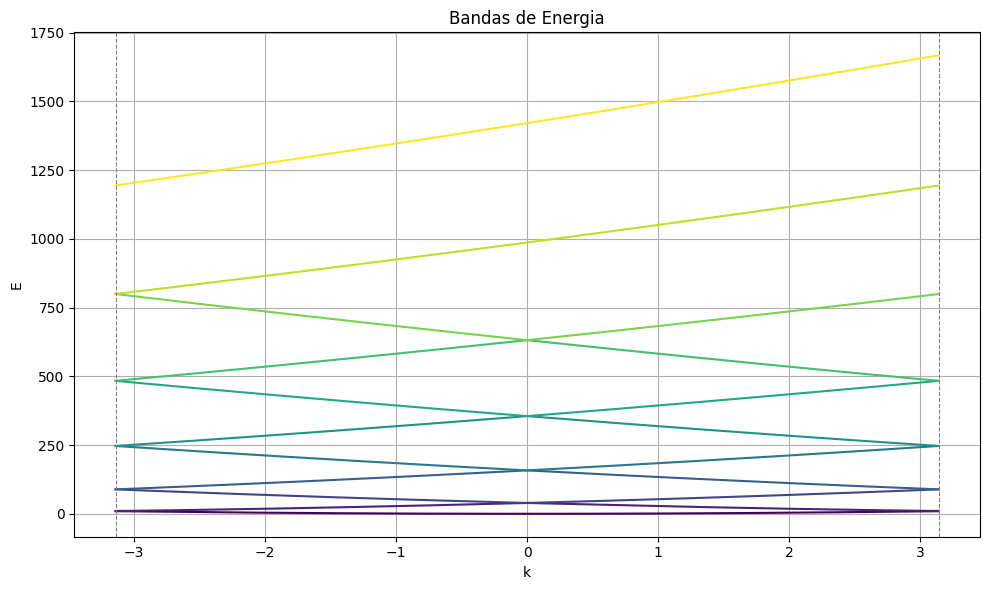


--- Exercício 2: Cálculo das Bandas com V(x) Genérico com Cores por Banda ---

### Potencial: V(x) = A cos(2πx) ###


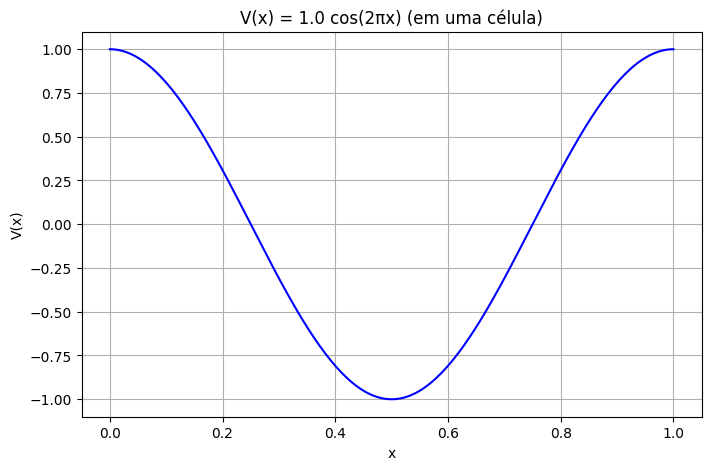


Matriz V_mn (parte real, arredondada) para V(x) = A cos(2πx):
[[ 0.   0.5 -0.  -0.  -0.   0.  -0.  -0.  -0. ]
 [ 0.5  0.   0.5 -0.  -0.  -0.   0.  -0.  -0. ]
 [-0.   0.5  0.   0.5 -0.  -0.  -0.   0.  -0. ]
 [-0.  -0.   0.5  0.   0.5 -0.  -0.  -0.   0. ]
 [-0.  -0.  -0.   0.5  0.   0.5 -0.  -0.  -0. ]
 [ 0.  -0.  -0.  -0.   0.5  0.   0.5 -0.  -0. ]
 [-0.   0.  -0.  -0.  -0.   0.5  0.   0.5 -0. ]
 [-0.  -0.   0.  -0.  -0.  -0.   0.5  0.   0.5]
 [-0.  -0.  -0.   0.  -0.  -0.  -0.   0.5  0. ]]


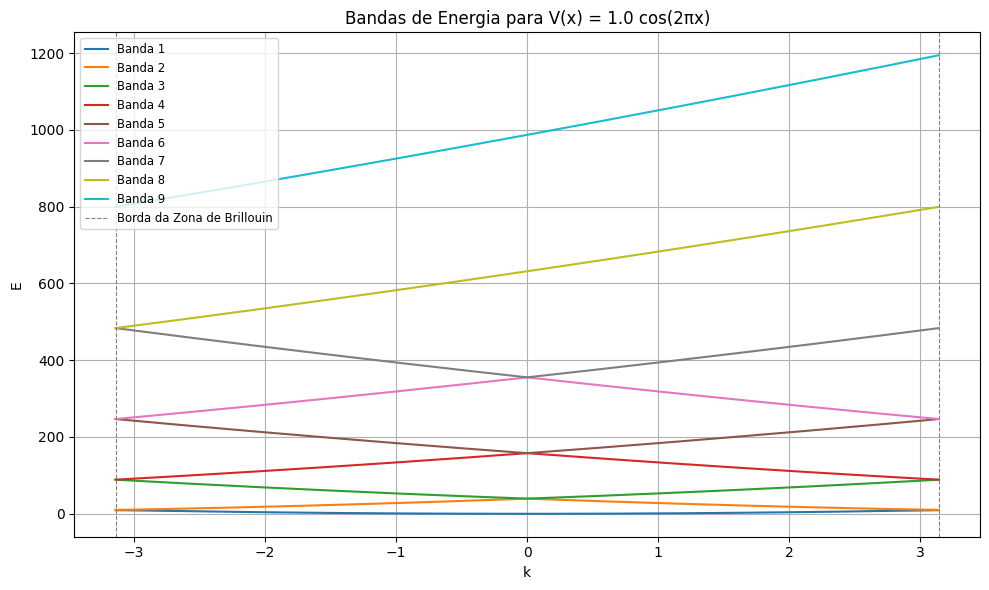


### Potencial: Gaussiana Única ###


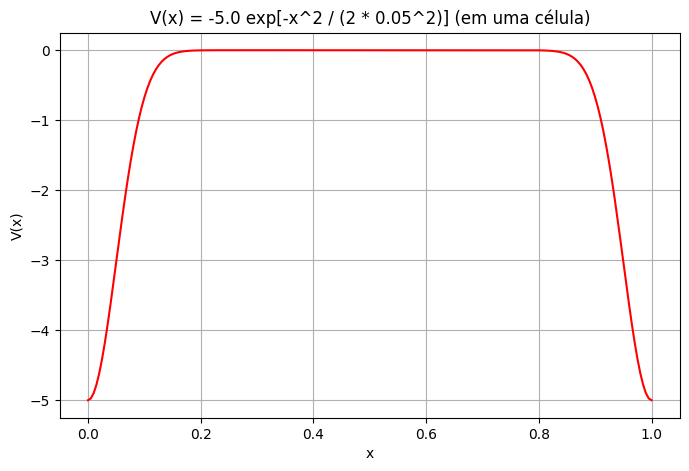


Matriz V_mn (parte real, arredondada) para Gaussiana Única:
[[-0.6267 -0.5965 -0.5144 -0.4019 -0.2845 -0.1825 -0.106  -0.0558 -0.0266]
 [-0.5965 -0.6267 -0.5965 -0.5144 -0.4019 -0.2845 -0.1825 -0.106  -0.0558]
 [-0.5144 -0.5965 -0.6267 -0.5965 -0.5144 -0.4019 -0.2845 -0.1825 -0.106 ]
 [-0.4019 -0.5144 -0.5965 -0.6267 -0.5965 -0.5144 -0.4019 -0.2845 -0.1825]
 [-0.2845 -0.4019 -0.5144 -0.5965 -0.6267 -0.5965 -0.5144 -0.4019 -0.2845]
 [-0.1825 -0.2845 -0.4019 -0.5144 -0.5965 -0.6267 -0.5965 -0.5144 -0.4019]
 [-0.106  -0.1825 -0.2845 -0.4019 -0.5144 -0.5965 -0.6267 -0.5965 -0.5144]
 [-0.0558 -0.106  -0.1825 -0.2845 -0.4019 -0.5144 -0.5965 -0.6267 -0.5965]
 [-0.0266 -0.0558 -0.106  -0.1825 -0.2845 -0.4019 -0.5144 -0.5965 -0.6267]]


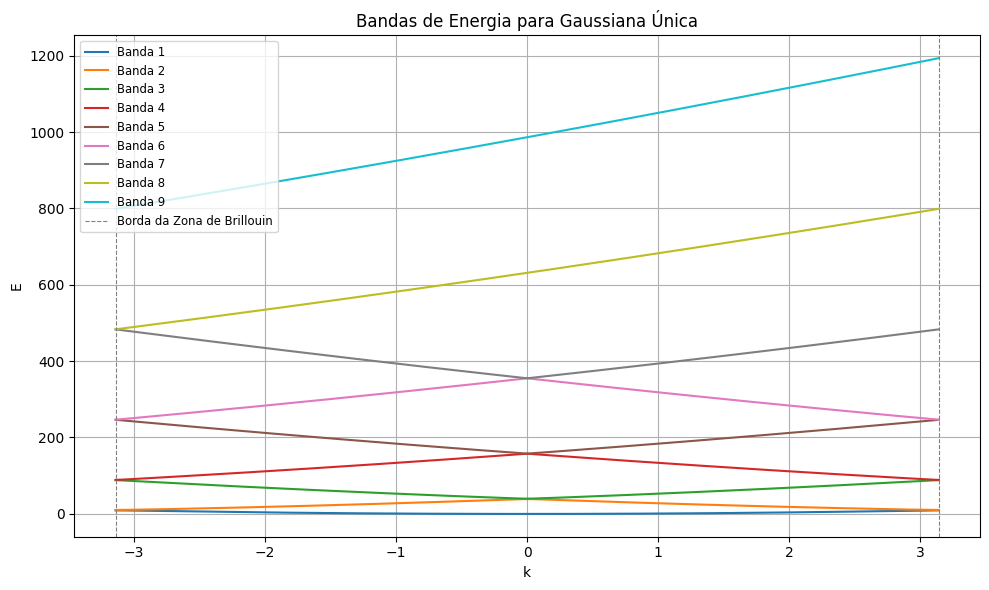


### Potencial: Gaussiana Dupla ###


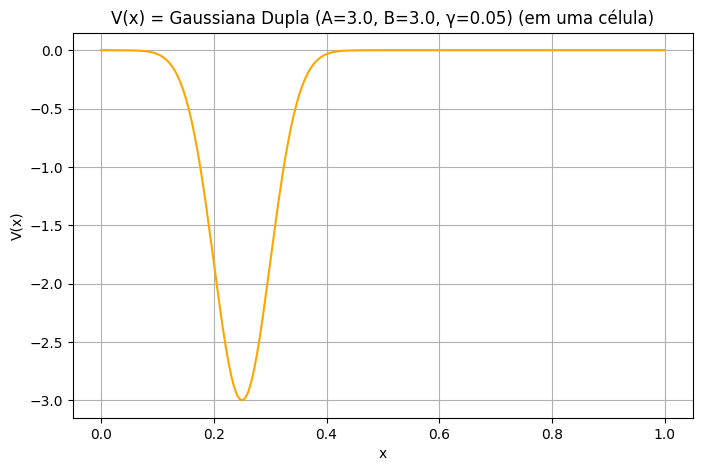


Matriz V_mn (parte real, arredondada) para Gaussiana Dupla:
[[-0.376   0.      0.3086  0.     -0.1707  0.      0.0636  0.     -0.016 ]
 [ 0.     -0.376   0.      0.3086  0.     -0.1707  0.      0.0636  0.    ]
 [ 0.3086  0.     -0.376   0.      0.3086  0.     -0.1707  0.      0.0636]
 [ 0.      0.3086  0.     -0.376   0.      0.3086  0.     -0.1707  0.    ]
 [-0.1707  0.      0.3086  0.     -0.376   0.      0.3086  0.     -0.1707]
 [ 0.     -0.1707  0.      0.3086  0.     -0.376   0.      0.3086  0.    ]
 [ 0.0636  0.     -0.1707  0.      0.3086  0.     -0.376   0.      0.3086]
 [ 0.      0.0636  0.     -0.1707  0.      0.3086  0.     -0.376   0.    ]
 [-0.016   0.      0.0636  0.     -0.1707  0.      0.3086  0.     -0.376 ]]


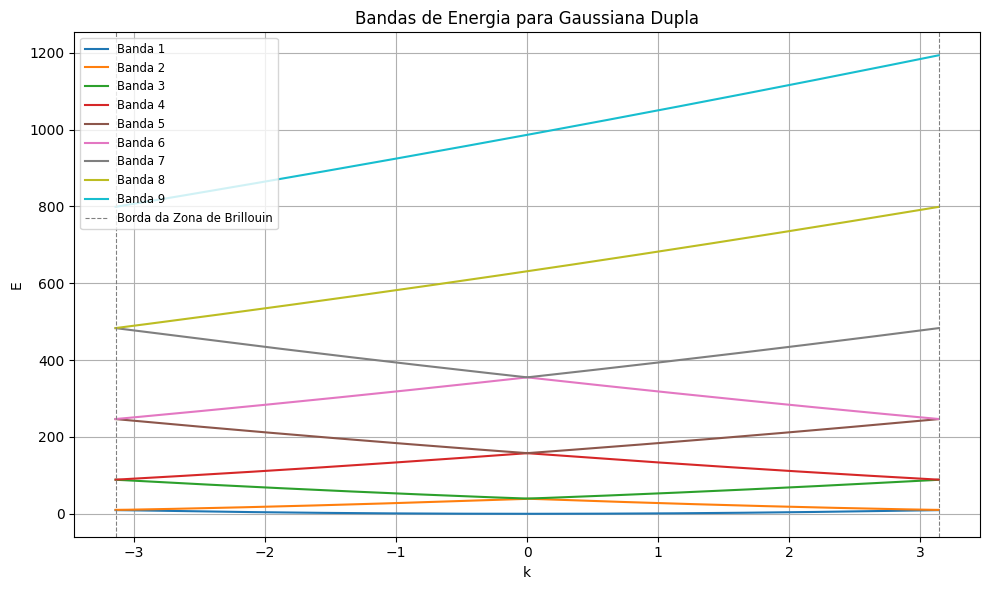

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --- Definição das Funções de Potencial V(x) ---
def V_x_cosine(x, A):
    """Potencial Cosseno: V(x) = A * cos(2πx)"""
    return A * np.cos(2 * np.pi * x)

def V_x_gaussian_single(x, A, gamma):
    """Potencial Gaussiana Única: V(x) = -A * exp[-x^2 / (2γ^2)]"""
    x_effective = (x + 0.5) % 1 - 0.5
    return -A * np.exp(-(x_effective**2) / (2 * gamma**2))

def V_x_gaussian_double(x, A, B, gamma):
    """Potencial Dupla Gaussiana: V(x) = -A * exp[-(x-1/4)^2 / (2γ^2)] - B * exp[-(x+1/4)^2 / (2γ^2)]"""
    x_effective = x % 1
    term1 = -A * np.exp(-((x_effective - 0.25)**2) / (2 * gamma**2))
    term2 = -B * np.exp(-((x_effective + 0.25 - 1)**2) / (2 * gamma**2)) if x_effective < 0.5 else \
            -B * np.exp(-((x_effective + 0.25)**2) / (2 * gamma**2))
    return term1 + term2

# --- Funções para Calcular Bandas ---
def calculate_bands_tridiagonal(k_points, alpha, num_G, alpha_diag2=0, alpha_diag3=0):
    """
    Calcula as bandas de energia para o Hamiltoniano tridiagonal (e variantes com mais diagonais).
    """
    all_bands = [[] for _ in range(num_G)] # Lista para cada banda

    G_indices = np.arange(-num_G // 2, num_G - num_G // 2)

    for k in k_points:
        H = np.zeros((num_G, num_G), dtype=complex)
        for i in range(num_G):
            G_i = 2 * np.pi * G_indices[i]
            H[i, i] = (k - G_i)**2

            if i + 1 < num_G:
                H[i, i + 1] = alpha
                H[i + 1, i] = alpha
            if alpha_diag2 != 0 and i + 2 < num_G:
                H[i, i + 2] = alpha_diag2
                H[i + 2, i] = alpha_diag2
            if alpha_diag3 != 0 and i + 3 < num_G:
                H[i, i + 3] = alpha_diag3
                H[i + 3, i] = alpha_diag3

        eigenvalues = np.linalg.eigvalsh(H)
        eigenvalues.sort()

        for i, val in enumerate(eigenvalues):
            all_bands[i].append(val)
    return all_bands

def calculate_V_mn(V_func, num_G, *args):
    """
    Calcula os elementos V_m,n da matriz de potencial usando integração numérica.
    """
    V_mn_matrix = np.zeros((num_G, num_G), dtype=complex)
    G_indices = np.arange(-num_G // 2, num_G - num_G // 2)

    for m_idx in range(num_G):
        for n_idx in range(num_G):
            G_diff_val = 2 * np.pi * (G_indices[m_idx] - G_indices[n_idx])
            integrand = lambda x: V_func(x, *args) * np.exp(-1j * G_diff_val * x)

            real_part = quad(lambda x: np.real(integrand(x)), 0, 1)[0]
            imag_part = quad(lambda x: np.imag(integrand(x)), 0, 1)[0]

            V_mn_matrix[m_idx, n_idx] = real_part + 1j * imag_part
    return V_mn_matrix

def calculate_bands_from_Vmn(k_points, V_mn_matrix, num_G):
    """
    Calcula as bandas de energia usando a matriz V_mn calculada.
    """
    all_bands = [[] for _ in range(num_G)] # Lista para cada banda

    G_indices = np.arange(-num_G // 2, num_G - num_G // 2)
    G_values = 2 * np.pi * G_indices

    for k in k_points:
        H = np.zeros((num_G, num_G), dtype=complex)
        for i in range(num_G):
            H[i, i] = (k - G_values[i])**2
        H += V_mn_matrix

        eigenvalues = np.linalg.eigvalsh(H)
        eigenvalues.sort()

        for i, val in enumerate(eigenvalues):
            all_bands[i].append(val)
    return all_bands

# --- Função Auxiliar para Plotar Bandas com Cores Diferentes ---
def plot_bands(k_points, bands, title, xlabel='k', ylabel='E', show_legend=True):
    """
    Plota as bandas de energia, cada uma com uma cor diferente.
    """
    plt.figure(figsize=(10, 6))

    # Define um conjunto de cores para as bandas
    # Se num_G for grande, podemos usar um colormap do matplotlib
    num_bands = len(bands)

    # Gera cores de um colormap (e.g., 'viridis', 'plasma', 'tab10')
    # 'tab10' é bom para até 10-20 bandas distintas
    # 'viridis' ou 'plasma' são bons para um número maior de bandas, dando um gradiente
    cmap = plt.cm.get_cmap('tab10' if num_bands <= 10 else 'viridis')
    colors = [cmap(i / (num_bands - 1)) for i in range(num_bands)] if num_bands > 1 else [cmap(0.5)]

    for i, band in enumerate(bands):
        plt.plot(k_points, band, color=colors[i], label=f'Banda {i+1}')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axvline(x=np.pi, color='gray', linestyle='--', label='Borda da Zona de Brillouin', linewidth=0.8)
    plt.axvline(x=-np.pi, color='gray', linestyle='--', linewidth=0.8)
    plt.grid(True)
    if show_legend and num_bands <= 10: # Não mostrar a legenda se houver muitas bandas para não poluir
        plt.legend(loc='best', fontsize='small')
    plt.tight_layout()
    plt.show()


# --- Parâmetros Comuns ---
k_points_common = np.linspace(-np.pi, np.pi, 200) # Pontos de k na 1ª Zona de Brillouin
num_G_value_common = 9 # Número de vetores G a serem considerados (tamanho da matriz)
x_plot_vals_common = np.linspace(0, 1, 200) # Intervalo [0,1] para plotar V(x) dentro de uma célula

print("--- Exercício 1: Hamiltoniano Tridiagonal com Cores por Banda ---")

# --- Plotando para se aproximar da Figura 9.4 (Ashcroft & Mermin) ---
alpha_main_fig94 = 0.5
alpha_secondary_fig94 = 0.15
alpha_tertiary_fig94 = 0.05
num_G_fig94_ex1 = 11

print(f"Parâmetros: α={alpha_main_fig94}, α_diag2={alpha_secondary_fig94}, α_diag3={alpha_tertiary_fig94}, N_G={num_G_fig94_ex1}")

bands_fig94_ex1 = calculate_bands_tridiagonal(k_points_common, alpha_main_fig94, num_G_fig94_ex1,
                                            alpha_diag2=alpha_secondary_fig94,
                                            alpha_diag3=alpha_tertiary_fig94)
plot_bands(k_points_common, bands_fig94_ex1, 'Bandas de Energia')

print("\n--- Exercício 2: Cálculo das Bandas com V(x) Genérico com Cores por Banda ---")

# --- Cenário 1: Potencial Cosseno V(x) = A cos(2πx) ---
A_cosine_ex2_colored = 1.0

print("\n### Potencial: V(x) = A cos(2πx) ###")
plt.figure(figsize=(8, 5))
plt.plot(x_plot_vals_common, [V_x_cosine(x, A_cosine_ex2_colored) for x in x_plot_vals_common], color='blue')
plt.title(f'V(x) = {A_cosine_ex2_colored} cos(2πx) (em uma célula)')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid(True)
plt.show()

V_mn_cos_ex2_colored = calculate_V_mn(V_x_cosine, num_G_value_common, A_cosine_ex2_colored)
print("\nMatriz V_mn (parte real, arredondada) para V(x) = A cos(2πx):")
print(np.round(V_mn_cos_ex2_colored.real, 4))

bands_cosine_ex2_colored = calculate_bands_from_Vmn(k_points_common, V_mn_cos_ex2_colored, num_G_value_common)
plot_bands(k_points_common, bands_cosine_ex2_colored, f'Bandas de Energia para V(x) = {A_cosine_ex2_colored} cos(2πx)')

# --- Cenário 2: Potencial Gaussiana Única ---
A_gaussian_ex2_colored = 5.0
gamma_gaussian_ex2_colored = 0.05

print("\n### Potencial: Gaussiana Única ###")
plt.figure(figsize=(8, 5))
plt.plot(x_plot_vals_common, [V_x_gaussian_single(x, A_gaussian_ex2_colored, gamma_gaussian_ex2_colored) for x in x_plot_vals_common], color='red')
plt.title(f'V(x) = -{A_gaussian_ex2_colored} exp[-x^2 / (2 * {gamma_gaussian_ex2_colored}^2)] (em uma célula)')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid(True)
plt.show()

V_mn_gaussian_single_ex2_colored = calculate_V_mn(V_x_gaussian_single, num_G_value_common, A_gaussian_ex2_colored, gamma_gaussian_ex2_colored)
print("\nMatriz V_mn (parte real, arredondada) para Gaussiana Única:")
print(np.round(V_mn_gaussian_single_ex2_colored.real, 4))

bands_gaussian_single_ex2_colored = calculate_bands_from_Vmn(k_points_common, V_mn_gaussian_single_ex2_colored, num_G_value_common)
plot_bands(k_points_common, bands_gaussian_single_ex2_colored, f'Bandas de Energia para Gaussiana Única')

# --- Cenário 3: Potencial Gaussiana Dupla ---
A_double_gaussian_ex2_colored = 3.0
B_double_gaussian_ex2_colored = 3.0
gamma_double_gaussian_ex2_colored = 0.05

print("\n### Potencial: Gaussiana Dupla ###")
plt.figure(figsize=(8, 5))
plt.plot(x_plot_vals_common, [V_x_gaussian_double(x, A_double_gaussian_ex2_colored, B_double_gaussian_ex2_colored, gamma_double_gaussian_ex2_colored) for x in x_plot_vals_common], color='orange')
plt.title(f'V(x) = Gaussiana Dupla (A={A_double_gaussian_ex2_colored}, B={B_double_gaussian_ex2_colored}, γ={gamma_double_gaussian_ex2_colored}) (em uma célula)')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid(True)
plt.show()

V_mn_gaussian_double_ex2_colored = calculate_V_mn(V_x_gaussian_double, num_G_value_common, A_double_gaussian_ex2_colored, B_double_gaussian_ex2_colored, gamma_double_gaussian_ex2_colored)
print("\nMatriz V_mn (parte real, arredondada) para Gaussiana Dupla:")
print(np.round(V_mn_gaussian_double_ex2_colored.real, 4))

bands_gaussian_double_ex2_colored = calculate_bands_from_Vmn(k_points_common, V_mn_gaussian_double_ex2_colored, num_G_value_common)
plot_bands(k_points_common, bands_gaussian_double_ex2_colored, f'Bandas de Energia para Gaussiana Dupla')